Dependencies:

In [ ]:
!pip install rdkit-pypi numpy

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem

In [ ]:
def TanimotoSimilarity(fp1, fp2):
    intersection = np.sum(np.minimum(fp1, fp2))
    union = np.sum(np.maximum(fp1, fp2))
    return intersection / float(union)

In [ ]:
import requests
import time

Data Retrieval:

In [ ]:
cids = [5280443,10467,312822,2518,234096,5281416,5351506,86821,965,437080,346340,866,857,22395651,985,840,5250,5280460,4819,312827,5281,25203368,262500,5250,327232,437080,262500,312827,234096,985,5281,522740 ]

In [ ]:
prolog = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"

str_cid = ",".join([ str(x) for x in cids])

url = prolog + "/compound/cid/" + str_cid + "/property/isomericsmiles/txt"
res = requests.get(url)
smiles = res.text.split()

In [ ]:
smiles

['C1=CC(=CC=C1C2=CC(=O)C3=C(C=C(C=C3O2)O)O)O',
 'CCCCCCCCCCCCCCCCCCCC(=O)O',
 'CC(C)C(C)CCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C',
 'C1=CC(=C(C=C1C=CC(=O)O)O)O',
 'CC1CCC2(C(C3C(O2)CC4C3(CCC5C4CC=C6C5(CCC(C6)O)C)C)C)OC1',
 'C1=CC(=O)OC2=CC(=C(C=C21)O)O',
 'C1=CC(=O)OC2=CC(=C(C=C21)OC3C(C(C(C(O3)CO)O)O)O)O',
 'CCC(CCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C)C(C)C',
 'CCCCCCCCC=CCCCCCCCC(=O)O',
 'CC1CCC2(C(C3C(O2)CC4C3(CCC5C4CC=C6C5(CCC(C6)OC7C(C(C(C(O7)CO)OC8C(C(C(C(O8)C)O)O)O)O)OC9C(C(C(C(O9)C)O)O)O)C)C)C)NC1',
 'COC1=C(C=C2C(=C1)C=CC(=O)O2)OC3C(C(C(C(O3)CO)O)O)O',
 'C(CCN)CC(C(=O)O)N',
 'CC(C)CC(C(=O)O)N',
 'CC(=O)[O-].CC(=O)OC',
 'CCCCCCCCCCCCCCCC(=O)O',
 'CC1C(C(C(C(O1)O)O)O)O',
 'CC1CCC2(C(C3C(O2)CC4C3(CCC5C4CC=C6C5(CCC(C6)O)C)C)C)NC1',
 'COC1=C(C=C2C(=C1)C=CC(=O)O2)O',
 'CCC1C(COC1=O)CC2=CN=CN2C',
 'CC1CCC2(C(C3C(O2)CC4C3(CCC5C4CCC6C5(CCC(C6)O)C)C)C)NC1',
 'CCCCCCCCCCCCCCCCCC(=O)O',
 'C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O[C@H]4[C@@H]([C@H]([C@@H]([C@H](O4)CO)O)O)O)O)[O-]',
 

Fingerprint Calculation:

In [ ]:
mols = [ Chem.MolFromSmiles(x) for x in smiles ]
fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024) for mol in mols]

Similarity Matrix Calculation:

In [ ]:
similarity_matrix = np.zeros((len(fps), len(fps)))
for i in range(len(fps)):
    for j in range(i+1, len(fps)):
        similarity_matrix[i][j] = TanimotoSimilarity(fps[i], fps[j])
        similarity_matrix[j][i] = similarity_matrix[i][j]

Visualization:

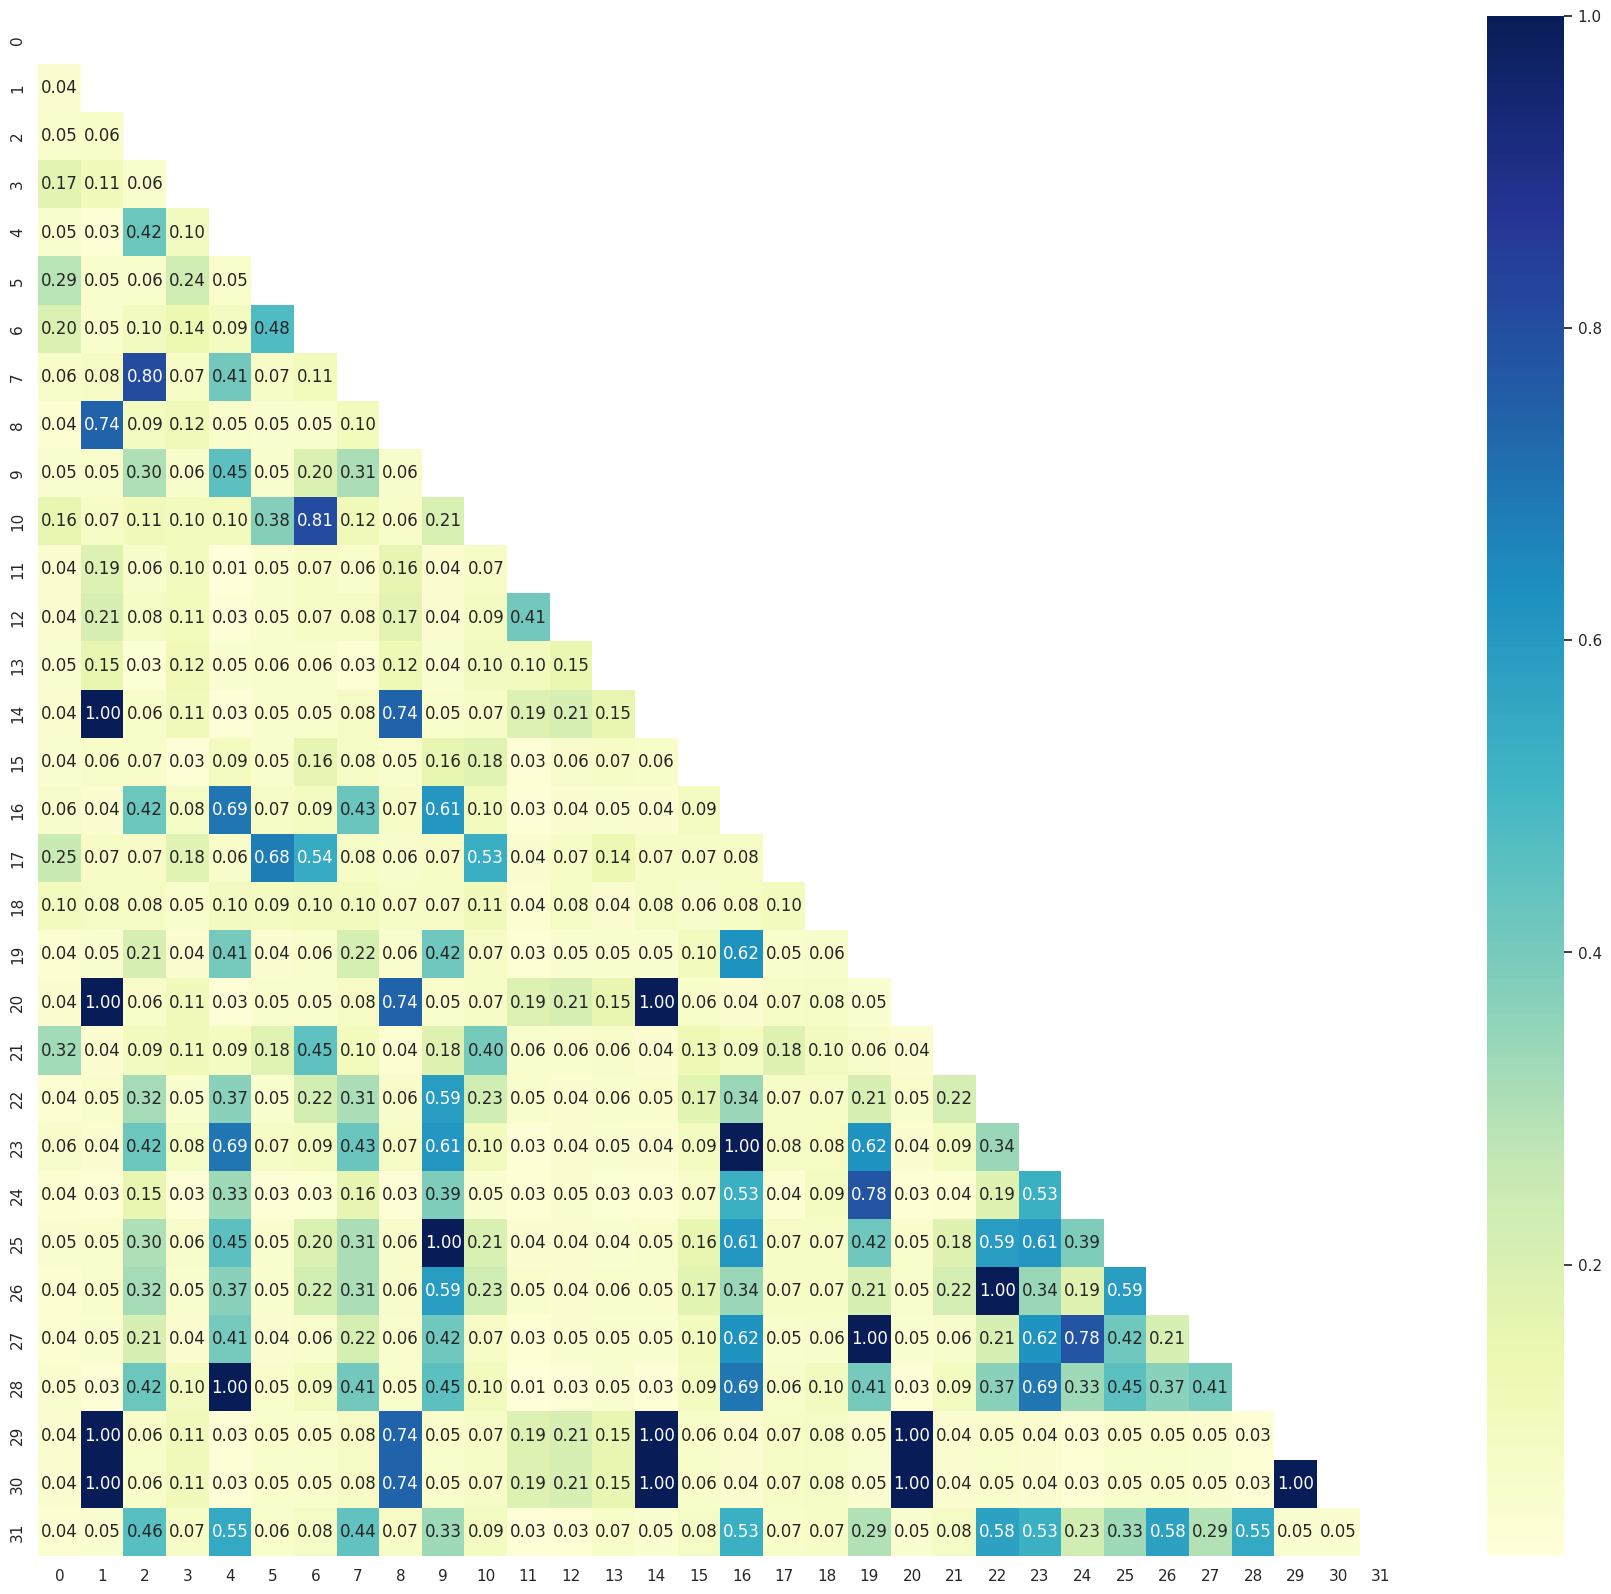

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
mask = np.zeros_like(similarity_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(22, 20))
sns.heatmap(similarity_matrix, mask=mask, cmap="YlGnBu", annot=True, fmt=".2f")
plt.show()

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

In [ ]:
df_similarity = pd.DataFrame(similarity_matrix)

In [ ]:
display(df_similarity)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.000000,0.043478,0.052632,0.170213,0.048780,0.285714,0.196721,0.064103,0.038462,0.047170,...,0.037736,0.061728,0.038961,0.047170,0.037736,0.038961,0.048780,0.043478,0.043478,0.037500
1,0.043478,0.000000,0.064516,0.108108,0.028571,0.052632,0.053571,0.078125,0.739130,0.054348,...,0.054945,0.043478,0.031250,0.054348,0.054945,0.047619,0.028571,1.000000,1.000000,0.045455
2,0.052632,0.064516,0.000000,0.057971,0.424658,0.058824,0.096386,0.803571,0.090909,0.303030,...,0.319588,0.424658,0.152941,0.303030,0.319588,0.209877,0.424658,0.064516,0.064516,0.463768
3,0.170213,0.108108,0.057971,0.000000,0.097222,0.236842,0.137931,0.070423,0.119048,0.061224,...,0.051020,0.082192,0.028169,0.061224,0.051020,0.042857,0.097222,0.108108,0.108108,0.070423
4,0.048780,0.028571,0.424658,0.097222,0.000000,0.054054,0.089888,0.407895,0.054054,0.451613,...,0.367347,0.692308,0.333333,0.451613,0.367347,0.405405,1.000000,0.028571,0.028571,0.550725
5,0.285714,0.052632,0.058824,0.236842,0.054054,0.000000,0.477273,0.071429,0.045455,0.051020,...,0.051546,0.068493,0.028571,0.051020,0.051546,0.043478,0.054054,0.052632,0.052632,0.056338
6,0.196721,0.053571,0.096386,0.137931,0.089888,0.477273,0.000000,0.105882,0.048387,0.196078,...,0.222222,0.089888,0.034091,0.196078,0.222222,0.058140,0.089888,0.053571,0.053571,0.080460
7,0.064103,0.078125,0.803571,0.070423,0.407895,0.071429,0.105882,0.000000,0.102941,0.306931,...,0.310000,0.426667,0.160920,0.306931,0.310000,0.216867,0.407895,0.078125,0.078125,0.444444
8,0.038462,0.739130,0.090909,0.119048,0.054054,0.045455,0.048387,0.102941,0.000000,0.061856,...,0.062500,0.068493,0.028571,0.061856,0.062500,0.058824,0.054054,0.739130,0.739130,0.071429
9,0.047170,0.054348,0.303030,0.061224,0.451613,0.051020,0.196078,0.306931,0.061856,0.000000,...,0.590000,0.607143,0.387097,1.000000,0.590000,0.417582,0.451613,0.054348,0.054348,0.333333


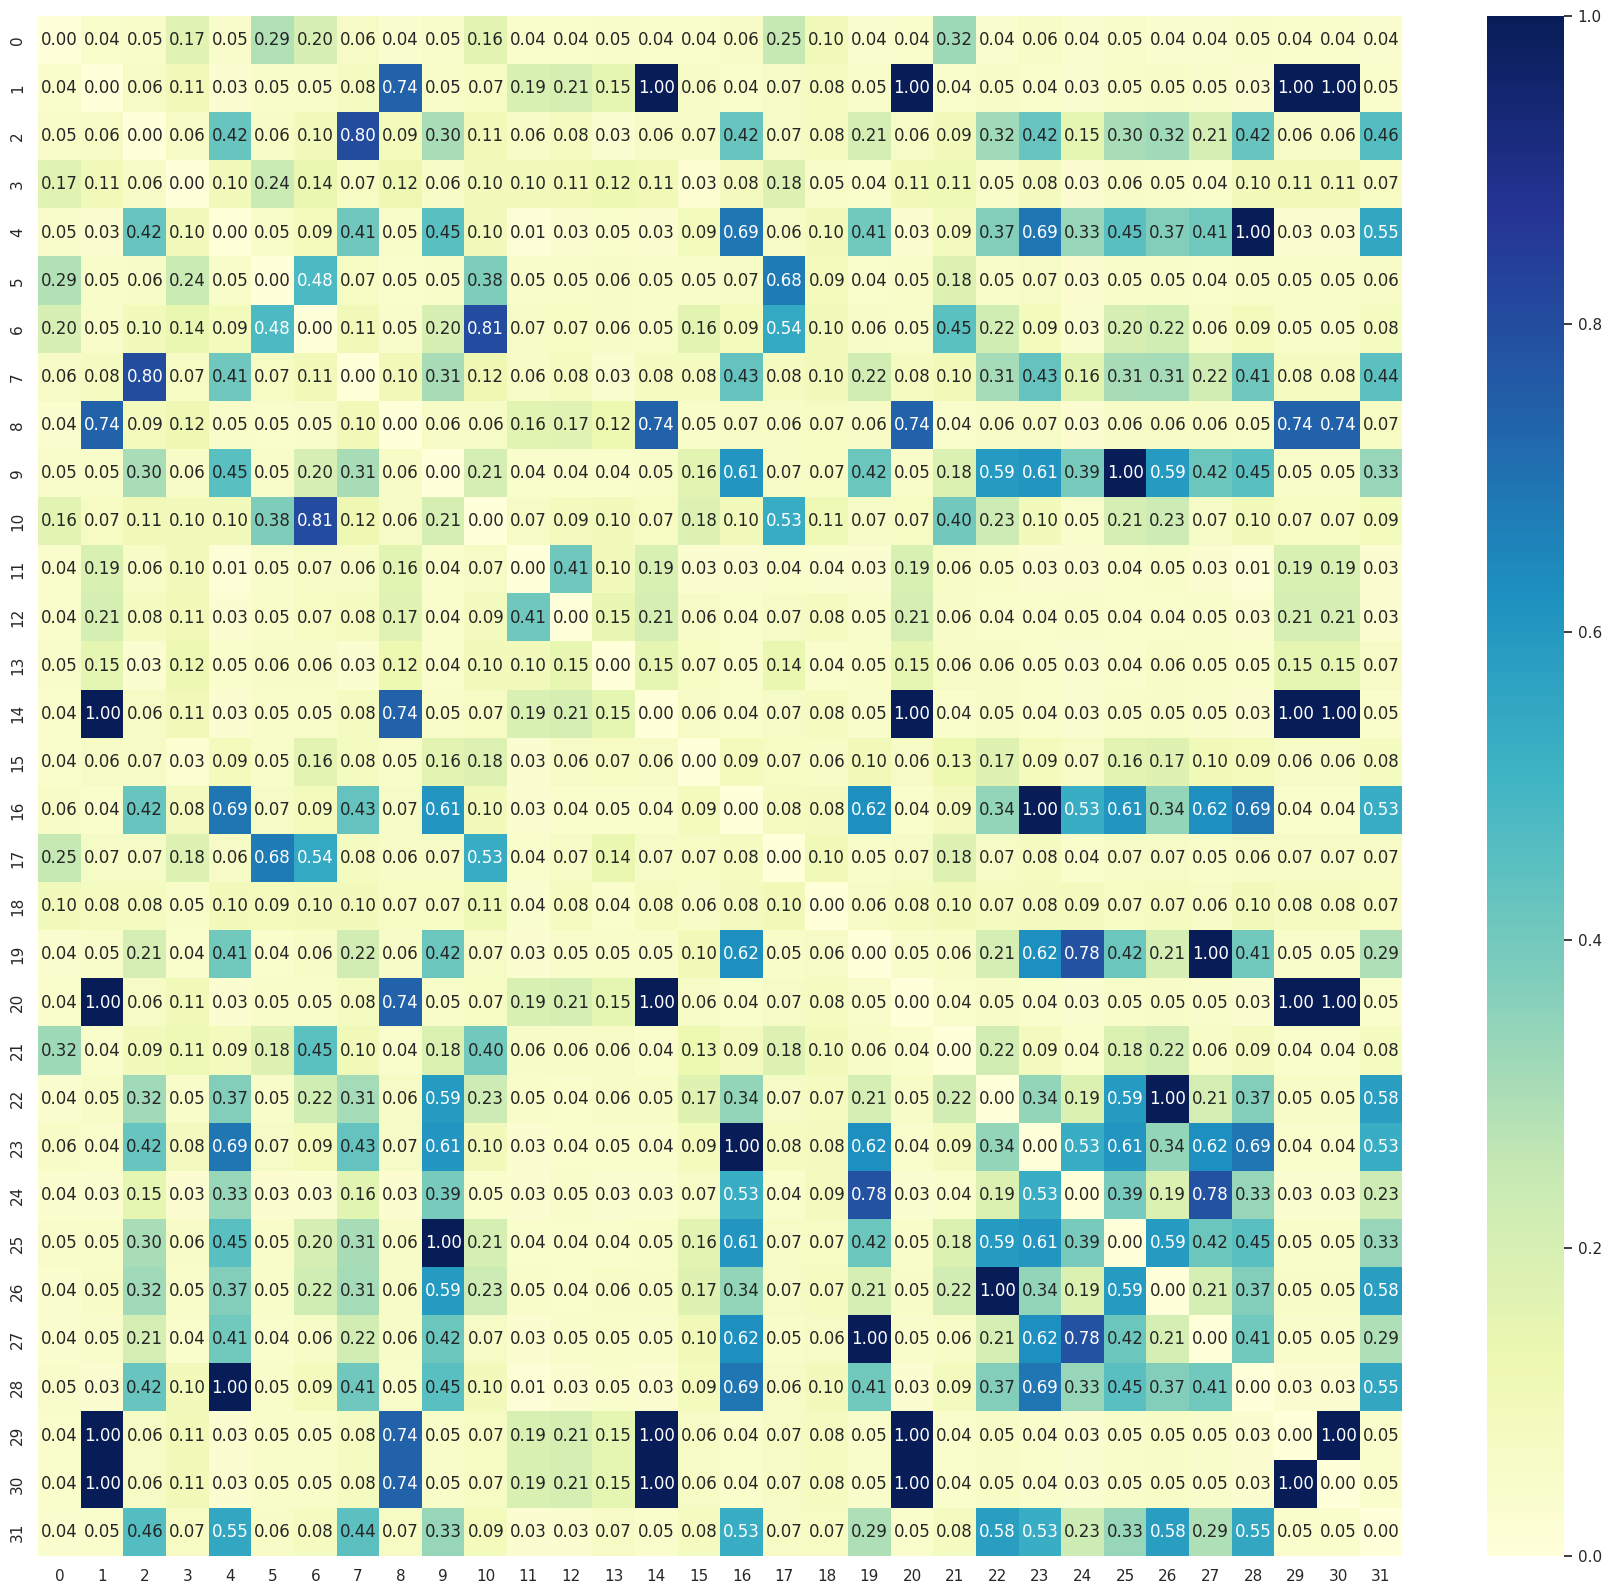

In [ ]:
sns.set(style="white")
plt.figure(figsize=(22, 20))
sns.heatmap(df_similarity, cmap="YlGnBu", annot=True, fmt=".2f")
plt.show()

Average Similarity and Plotting:

In [ ]:
avg_similarity = df_similarity.mean(axis=1)

In [ ]:
sorted_molecules = avg_similarity.sort_values(ascending=False)

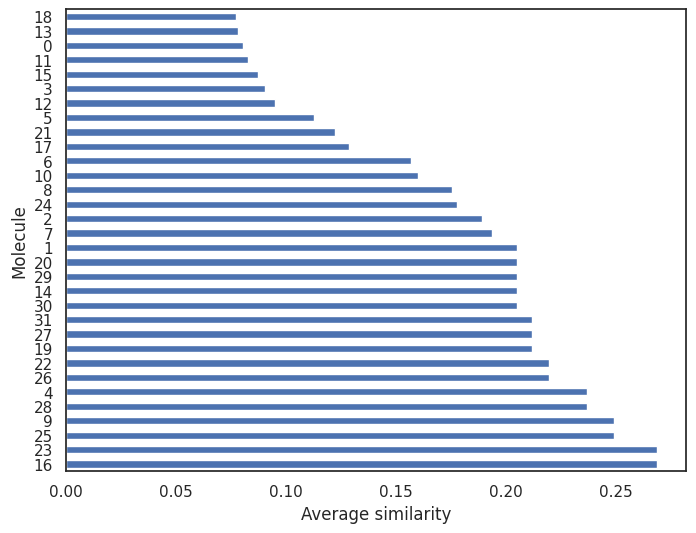

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
sorted_molecules.plot(kind='barh', ax=ax)
ax.set_xlabel('Average similarity')
ax.set_ylabel('Molecule')
plt.show()

Reference Molecule Similarity:

In [ ]:
# Define a reference molecule
# 4-Anilino-7-(3,5-dimethyl-1,2-oxazol-4-yl)quinoline-3-carboxylic acid (CID:70681152)
ref_mol = Chem.MolFromSmiles("CC1=C(C(=NO1)C)C2=CC3=NC=C(C(=C3C=C2)NC4=CC=CC=C4)C(=O)O")

In [ ]:
from rdkit.DataStructs import BulkTanimotoSimilarity

In [ ]:
# Compute the fingerprints for the reference molecule and the list of molecules
ref_fp = Chem.RDKFingerprint(ref_mol)

In [ ]:
mols = [ Chem.MolFromSmiles(x) for x in smiles ]
mol_fps = [AllChem.RDKFingerprint(mol) for mol in mols]

In [ ]:
# Calculate the Tanimoto similarity between the reference molecule and the list of molecules
similarity_scores = BulkTanimotoSimilarity(ref_fp, mol_fps)

In [ ]:
# Print the similarity scores
print(similarity_scores)

[0.2957639939485628, 0.025495750708215296, 0.12312811980033278, 0.13672922252010725, 0.22364457831325302, 0.18090452261306533, 0.32535211267605635, 0.12312811980033278, 0.036414565826330535, 0.316688567674113, 0.3317107093184979, 0.04810360777058279, 0.041589648798521256, 0.012487992315081652, 0.025495750708215296, 0.12639724849527084, 0.2607773851590106, 0.1986863711001642, 0.22498060512024826, 0.22255192878338279, 0.025495750708215296, 0.4186046511627907, 0.28481894150417825, 0.2607773851590106, 0.2218100890207715, 0.316688567674113, 0.28481894150417825, 0.22255192878338279, 0.22364457831325302, 0.025495750708215296, 0.025495750708215296, 0.19201228878648233]


CID:151166 Lumiracoxib
Lumiracoxib has a different structure from the standard COX-2 inhibitors (e.g. celecoxib). It more closely resembles the structure of diclofenac (one chlorine substituted by fluorine, the phenylacetic acid has another methyl group in meta position), making it a member of the arylalkanoic acid family of NSAIDs. It binds to a different site on the COX-2 receptor than the standard COX-2 inhibitors. It displays extremely high COX-2 selectivity.

7847633 :Celecoxib inhibits cyclooxygenase 2 (COX-2) enzyme, reducing pain and inflammation. It is important to note that though the risk of bleeding with celecoxib is lower than with certain other NSAIDS, it exists nonetheless and caution must be observed when it is administered to those with a high risk of gastrointestinal bleeding.[L7607]

**A note on the risk of cardiovascular events**

Significant concerns regarding the safety of COX-2 selective NSAIDs emerged in the early 2000s. [Rofecoxib], another member of the COX-2 inhibitor drug class, also known as Vioxx, was withdrawn from the market due to prothrombotic cardiovascular risks.[L7622] Following an FDA Advisory Committee meeting in 2005, in which data from large clinical outcome trials were evaluated, the FDA concluded that the risk for cardiovascular thrombotic events for both COX-2 selective NSAIDs and nonselective NSAIDs was evident.[L3293] It was determined that the benefits of celecoxib treatment, however, outweighed the risks.[L7622] Postmarketing cardiovascular outcomes trial (PRECISION) revealed that the lowest possible dose of celecoxib was similar in cardiovascular safety to moderate strength doses of both naproxen and ibuprofen. Patients who had previous cardiovascular events including acute MI, coronary revascularization, or coronary stent insertion were not evaluated in the trial. It is not advisable to administer NSAIDS to these groups of patients.